<a href="https://colab.research.google.com/github/purischaky/intro_to_github/blob/main/Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
#Import dataset
!pip install palmerpenguins
from palmerpenguins import load_penguins


In [3]:
#preview data
df= load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [5]:
# Drop rows with missing values
df.dropna(inplace=True)
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

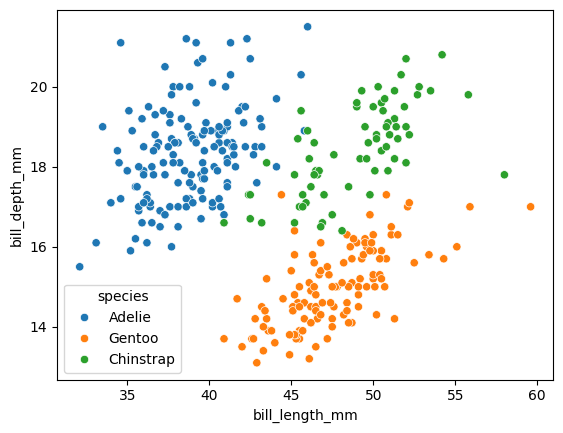

In [6]:
#visualizes the relationship between bill length and bill depth
sns.scatterplot(df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.show()

In [7]:
#Skewness of numeric variables
print('-' * 35)

for i in df.select_dtypes(['int64', 'float64']).columns.tolist():
    print(i, ' : ',df[i].skew())

-----------------------------------
bill_length_mm  :  0.045340470420401305
bill_depth_mm  :  -0.1497202576146911
flipper_length_mm  :  0.36014797697479284
body_mass_g  :  0.4722460732964027
year  :  -0.07726125689190333


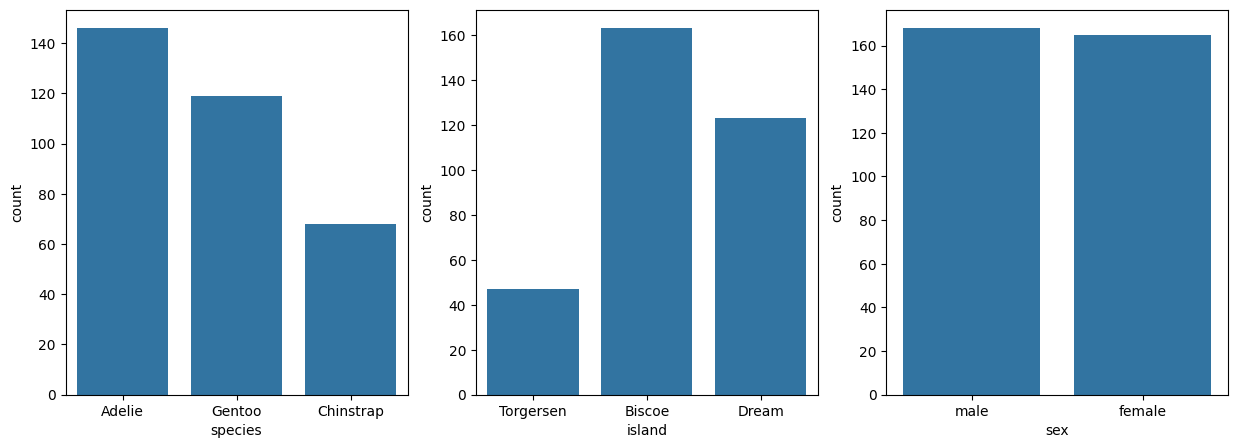

In [8]:
#Visualize categorical variables (species, island and sex)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.countplot(x='species', data=df, ax=axes[0])
sns.countplot(x='island', data=df, ax=axes[1])
sns.countplot(x='sex', data=df, ax=axes[2])
plt.show()


In [9]:
# Encode categorical labels
df[['species','island','sex']] = df[['species','island','sex']].apply(LabelEncoder().fit_transform)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,39.1,18.7,181.0,3750.0,1,2007
1,0,2,39.5,17.4,186.0,3800.0,0,2007
2,0,2,40.3,18.0,195.0,3250.0,0,2007
4,0,2,36.7,19.3,193.0,3450.0,0,2007
5,0,2,39.3,20.6,190.0,3650.0,1,2007


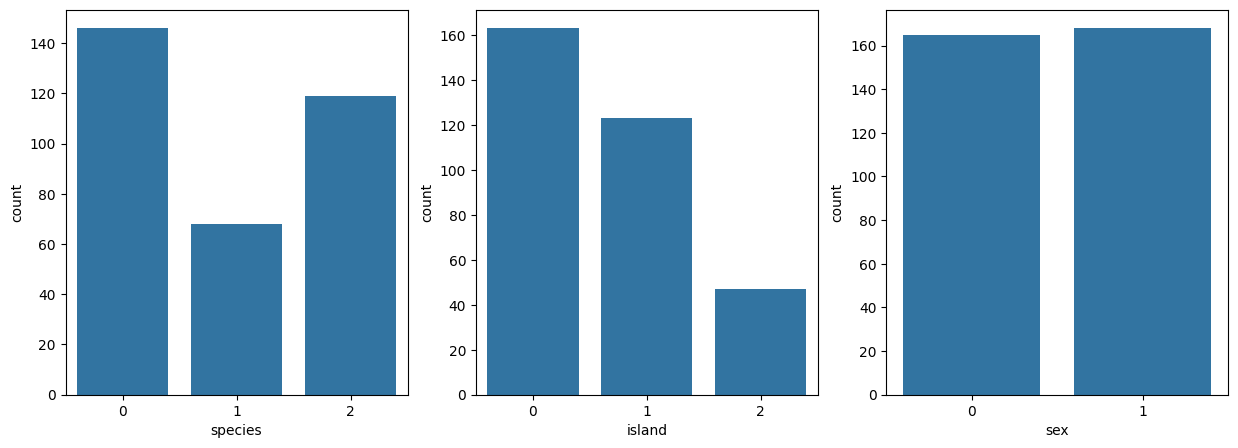

In [10]:
#Visualize encode variables (species, island and sex)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.countplot(x='species', data=df, ax=axes[0])
sns.countplot(x='island', data=df, ax=axes[1])
sns.countplot(x='sex', data=df, ax=axes[2])
plt.show()


In [11]:
# Split data into features and labels
X = df.drop(['species','year'], axis=1)
y = df['species']

In [12]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

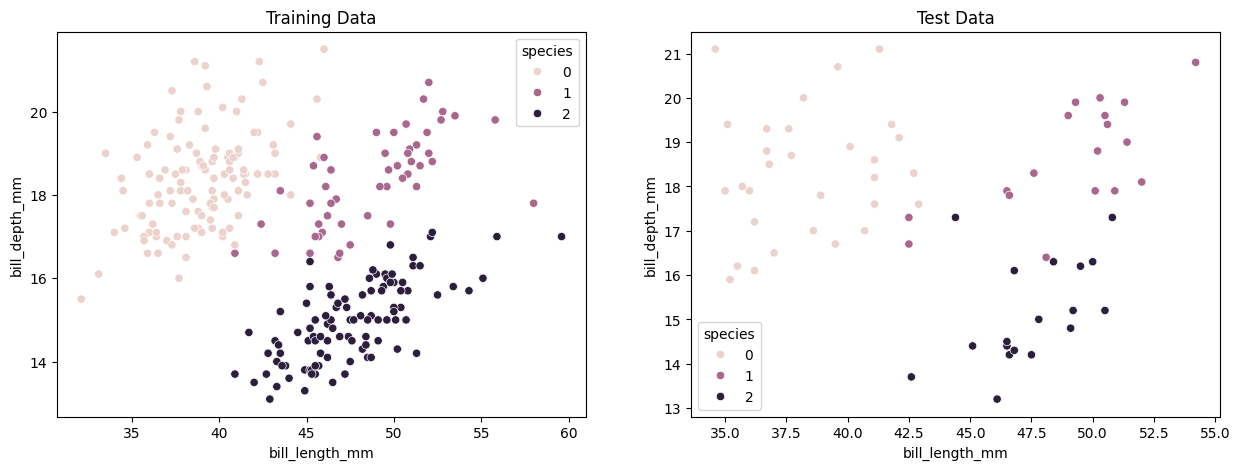

In [13]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the training data on the first subplot
sns.scatterplot(ax=ax1, x=X_train['bill_length_mm'], y=X_train['bill_depth_mm'], hue=y_train)
ax1.set_title('Training Data')

# Plot the test data on the second subplot
sns.scatterplot(ax=ax2, x=X_test['bill_length_mm'], y=X_test['bill_depth_mm'], hue=y_test)
ax2.set_title('Test Data')

# Show the plot
plt.show()


In [14]:
# create a neural network to classify penguins species

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2627 (10.26 KB)
Trainable params: 2627 (10.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the results
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


Epoch 1/50
8/8 [==============================] - 1s 44ms/step - loss: 114.7696 - accuracy: 0.2887 - val_loss: 70.9883 - val_accuracy: 0.4074
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 47.7538 - accuracy: 0.4226 - val_loss: 39.7257 - val_accuracy: 0.4074
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 33.3739 - accuracy: 0.3138 - val_loss: 18.3910 - val_accuracy: 0.4074
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 18.2364 - accuracy: 0.3808 - val_loss: 4.9974 - val_accuracy: 0.0000e+00
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 12.6761 - accuracy: 0.2385 - val_loss: 7.7673 - val_accuracy: 0.4074
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 8.9262 - accuracy: 0.4226 - val_loss: 10.0875 - val_accuracy: 0.2222
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 7.2941 - accuracy: 0.3724 - val_loss: 3.3851 - val_accuracy: 0.7037
Epoch 8/50
8/8 [===

In [16]:
# prediction utilizing user input

# Get user input
island = float(input('island: '))
bill_length_mm = float(input('Enter bill length (mm): '))
bill_depth_mm = float(input('Enter bill depth (mm): '))
flipper_length_mm = float(input('Enter flipper length (mm): '))
body_mass_g = float(input('Enter body mass (g): '))
sex = float(input('sex: '))
#year = float(input('year: '))

# Create a numpy array with the user input
user_input = np.array([[island,bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]])

# Make a prediction
prediction = model.predict(user_input)

# Get the index of the predicted class
predicted_class_index = np.argmax(prediction)

# Get the name of the predicted class
predicted_class_name = df['species'].iloc[predicted_class_index]

# Assuming predicted_class_index holds the predicted class index
species_names = {0: "Adelie", 1: "Chinstrap", 2: "Gentoo"}

# Access the predicted species name using the index
predicted_species_name = species_names.get(predicted_class_index)

# Print the prediction
print(f'Predicted species: {predicted_species_name}')


island: 2
Enter bill length (mm): 39
Enter bill depth (mm): 18
Enter flipper length (mm): 181
Enter body mass (g): 3750
sex: 1
1/1 [==============================] - 0s 96ms/step
Predicted species: Adelie


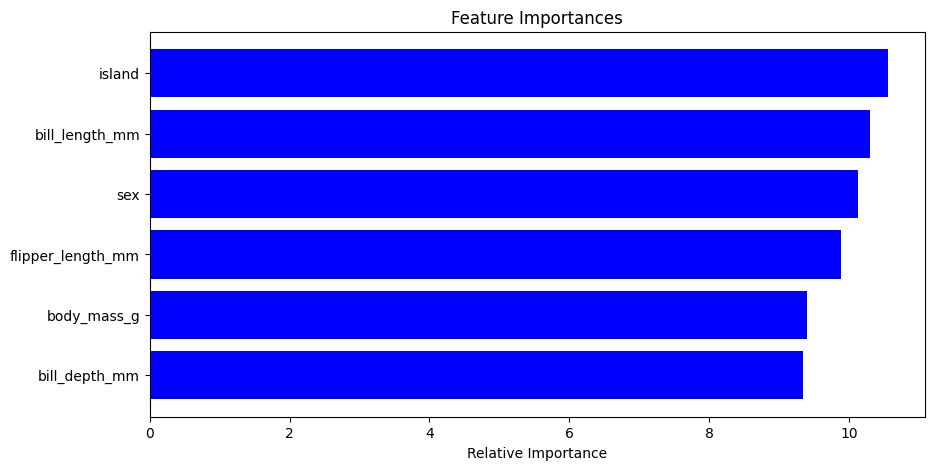

In [23]:
#feature importance
# Get weights from the first layer of the neural network
weights = model.layers[0].get_weights()[0]

# Calculate the absolute sum of weights for each feature
importances = np.sum(np.abs(weights), axis=1)

# Get feature names
features = X.columns

# Sort features based on importance
indices = np.argsort(importances)

# Create the plot
plt.figure(figsize=(10, 5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [31]:
#model explainability

import numpy as np
# Get the weights from the first layer of the model
weights = model.layers[0].get_weights()[0]

# Calculate the absolute sum of the weights for each feature
importances = np.sum(np.abs(weights), axis=1)

# Get the names of the features
features = X.columns

# Sort the features by importance in descending order
indices = np.argsort(importances)[::-1]

# Print the features and their importances
for i in range(len(features)):
    print(f"{features[indices[i]]:20} {importances[indices[i]]:.4f}")


island               10.5533
bill_length_mm       10.3005
sex                  10.1253
flipper_length_mm    9.8808
body_mass_g          9.4002
bill_depth_mm        9.3378
